# Problem Definitions

This dataset is of Iris flower. It is kind of species of flower which is found in almost all part of region in the world.
more information from the kaggle:


The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

# Data

We can found the data from the kaggle and also from official websites.
below is information of data link:

Kaggle : https://www.kaggle.com/uciml/iris

UCI Machine Learning Repository : http://archive.ics.uci.edu/ml/datasets/Iris

# Evaluations

Here we will do the data exporation so to find some meaningful information. if there we get any information which cn be usable the we will do that.

# Modelling
We will do the mdelling to predict the classification of iris flowers petals.

# Feature Engineering

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

These are the data on which we have to evaluate the things

# Preparing the tools

In [1]:
# Importing the tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plot to appear inside notebook
%matplotlib inline

# Models from scikit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import evaluation metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import roc_curve

# Load Data

In [2]:
df = pd.read_csv("Iris\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


There is no use of ID while trsing the data, seo can remove the ID from data set.

In [7]:
# Removing ID from dataset
df = df.drop("Id", axis=1)

In [8]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [11]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


(4.0, 0.0)

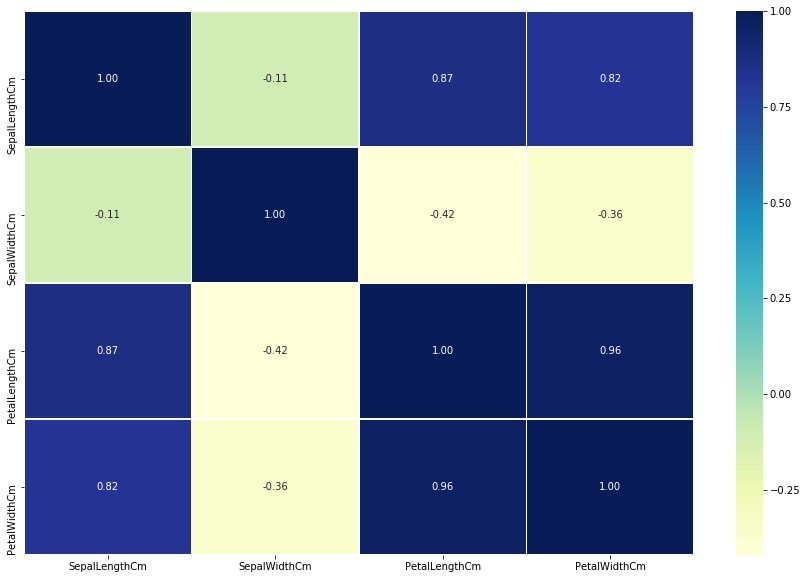

In [12]:
# Making correlation matrix more prettier withmore colour details using seaborn

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap="YlGnBu");

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

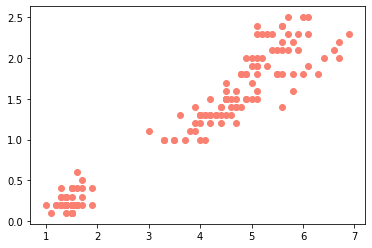

In [13]:
plt.scatter(df.PetalLengthCm,
            df.PetalWidthCm,
            color = "salmon")

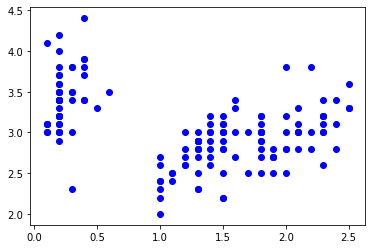

In [14]:
plt.scatter(df.PetalWidthCm,
            df.SepalWidthCm,
            color = "blue")

Now Converting the labelled variable into numerical varaible.

In [22]:
df.Species[df.Species=="Iris-setosa"]=1
df.Species[df.Species=="Iris-virginica"]=2
df.Species[df.Species=="Iris-versicolor"]=3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [23]:
df["Species"].value_counts()

3    50
2    50
1    50
Name: Species, dtype: int64

In [25]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [27]:
df["Species"]=df["Species"].astype(int)

In [28]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

Since the visualization is nice. What I can do is I can split the model into test and train.

# Splitting of the data

I will split the data into x and y.

In [29]:
X = df.drop("Species", axis = 1)
y = df["Species"]

In [30]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [39]:
def fit_and_scores(models, X_train, X_test, y_train, y_test):
    '''
    Here everything is done so that all three values can be calculated in single time only
    '''
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        # finding the scores and trainig the model
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [60]:
scores = fit_and_scores(models=models,
               X_train=X_train,
               X_test=X_test,
               y_train=y_train,
               y_test=y_test)

Some of the things I will do further

* Hyperparameter Tuning with RandomizedSearchCV and GridSearchCV (2hrs)
* Confusion Matrix (30mins)
* f1_score |
* precision |
* recall |
* Classification Report (1hr)
* ROC Curve |
* AUC Curve (1hr)

These parameter we will test and try to get the solutions


# Hyperparameter Tuning

In [42]:
# What first I can do...that I will first tune KNN

train_scores = []
test_scores = []
'''
First I will take out the values of train and test scores.
And then store these things into train_list and test list respectively
'''
'''
Now I will create a varaible which stores different values of K neighbors_classifier
'''
neighbors = range(1, 21)

#Setup KNN instances
knn = KNeighborsClassifier()

# Now trying to put each values of neighbors using loop
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test_score List
    test_scores.append(knn.score(X_test, y_test))

In [43]:
train_scores

[1.0,
 0.9833333333333333,
 0.975,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.975,
 0.9666666666666667,
 0.975,
 0.9666666666666667,
 0.975,
 0.9666666666666667,
 0.975,
 0.9666666666666667,
 0.975]

In [44]:
test_scores

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667]

Now plotting the graph of test_scores and train_scores

Maximum Scores on KNN scores  on test data: 100.00%


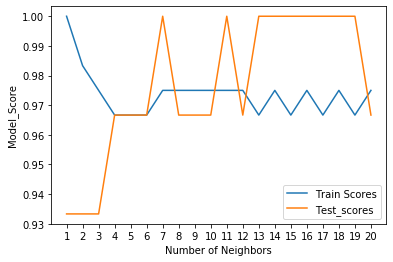

In [45]:
plt.plot(neighbors, train_scores, label = "Train Scores")
plt.plot(neighbors, test_scores, label = "Test_scores")
plt.xticks(np.arange(1, 21, 1)) # This is needed because because there should be interval of 1 in x-axis
plt.xlabel("Number of Neighbors")
plt.ylabel("Model_Score")
plt.legend()

print(f"Maximum Scores on KNN scores  on test data: {max(test_scores)*100:.2f}%")

## Hyper parameter tuning with Randomized Search CV
We are going to tune:
    * LogisticRegression()
    * RandomForestClassifier()
    
....using Randomize Search Cv

In [56]:
# Creating hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifer
rf_grid = {"n_estimators" : np.arange(10, 500, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

In [57]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameters search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose =True)
# Fit Randome Hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [58]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [59]:
rs_log_reg.score(X_test, y_test)

0.9333333333333333

In [61]:
scores

{'Logistic Regression': 0.9666666666666667,
 'KNN': 0.9666666666666667,
 'Random Forest': 0.9333333333333333}

We have Tuned Logistic Regression ()... Lets do the same for randomforestclassifier()

In [64]:
# Setup Random Seeds
np.random.seed(42)

#Setup Random Heyperparamenter Search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)
# Fit random hyperparameters search model for RadomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
                   verbose=True)

In [65]:
#Find the best parameters 
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': None}

In [66]:
rs_rf.score(X_test, y_test)

0.9333333333333333

In [67]:
scores

{'Logistic Regression': 0.9666666666666667,
 'KNN': 0.9666666666666667,
 'Random Forest': 0.9333333333333333}

## Now evaluating the best model or tuned model using Machine Learning Classifier or beyond Accuracy

* ROC Curve
* Confusion Matrix
* Classification Ireport
* Precusion
* Recall
* F1 Score

In [68]:
y_preds = knn.predict(X_test)

In [69]:
y_preds

array([1, 3, 2, 2, 3, 2, 1, 1, 1, 3, 1, 2, 3, 1, 1, 2, 3, 1, 2, 2, 3, 1,
       2, 2, 2, 3, 2, 3, 2, 1])

In [70]:
y_test

9      1
52     3
131    2
137    2
89     3
141    2
36     1
26     1
8      1
91     3
43     1
140    2
65     3
30     1
17     1
70     3
59     3
28     1
135    2
146    2
88     3
46     1
133    2
101    2
149    2
61     3
120    2
54     3
139    2
15     1
Name: Species, dtype: int32

In [73]:
# Building confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[10  0  0]
 [ 0 11  0]
 [ 0  1  8]]


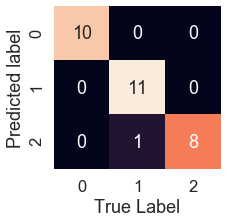

In [74]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice ooking confusion matrix using seaborn heatmap()
    """
    fig, ax= plt.subplots(figsize= (3, 3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot = True,
                   cbar = False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
    
    bottom, top= ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

In [75]:
# printing classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.92      1.00      0.96        11
           3       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

